In [1]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import json
import numpy as np

In [2]:
df = pd.read_csv("VeloLPData.csv")

In [3]:
df.head()

,Unnamed: 0,block_number,block_timestamp,tx_hash,event_index,origin_function_signature,origin_from_address,origin_to_address,pool_address,pool_name,...,token1_symbol,token0_amount,token1_amount,token0_amount_usd,token1_amount_usd,token0_address,token1_address,lp_token_action,lp_token_amount,lp_token_amount_usd
0,0,67243136,2023-01-15 13:26:17.000,0x81d5176912a3ce1c15eca10f6c933b07cc85fe67df93...,48,0xde5f6268,0xd37f04d801371d8fa13fc9583f7b755fe67bf2b7,0xcadc68d5834898d54929e694ed19e833e0117694,0xbf205335de602ac38244f112d712ab04cb59a498,sAMM-wstETH/WETH,...,WETH,0.000432,0.000914,0.73,1.40,0x1f32b1c2345538c0c6f582fcb022739c4a194ebb,0x4200000000000000000000000000000000000006,mint,0.000669,2.13
1,1,67234818,2023-01-15 13:13:02.000,0xfe8b5b75e9e7b25ada3f09a411b7758588cf82225c13...,5,0xb7e0d4c0,0xd37f04d801371d8fa13fc9583f7b755fe67bf2b7,0x9c12939390052919af3155f41bf4160fd3666a6f,0xbf205335de602ac38244f112d712ab04cb59a498,sAMM-wstETH/WETH,...,WETH,6.473000,13.707504,10891.73,21019.77,0x1f32b1c2345538c0c6f582fcb022739c4a194ebb,0x4200000000000000000000000000000000000006,mint,10.033073,31911.50
2,2,67021593,2023-01-15 07:27:36.000,0xc9fc1c502ce2a031f93a4dcd83778e6ee851bfe00d77...,4,0x5a47ddc3,0x14da1d50102b7e29103dd28ca2f2796866c99b11,0x9c12939390052919af3155f41bf4160fd3666a6f,0xbf205335de602ac38244f112d712ab04cb59a498,sAMM-wstETH/WETH,...,WETH,0.900083,1.907985,1504.70,2909.14,0x1f32b1c2345538c0c6f582fcb022739c4a194ebb,0x4200000000000000000000000000000000000006,mint,1.396049,4413.84
3,3,67437958,2023-01-15 19:57:42.000,0xe1c443b612172f4bf987368e52b14236614d0aef56fe...,48,0xde5f6268,0xb8890f4fe79a1a5e2a9a5fb51b5f0d5b3d9fb057,0xcadc68d5834898d54929e694ed19e833e0117694,0xbf205335de602ac38244f112d712ab04cb59a498,sAMM-wstETH/WETH,...,WETH,0.000334,0.000707,0.57,1.09,0x1f32b1c2345538c0c6f582fcb022739c4a194ebb,0x4200000000000000000000000000000000000006,mint,0.000517,1.66
4,4,67436254,2023-01-15 19:52:27.000,0x97bb87f77d38bb3fac82a9564f77e05d012947a7e8bd...,5,0xb7e0d4c0,0xb8890f4fe79a1a5e2a9a5fb51b5f0d5b3d9fb057,0x9c12939390052919af3155f41bf4160fd3666a6f,0xbf205335de602ac38244f112d712ab04cb59a498,sAMM-wstETH/WETH,...,WETH,3.399669,7.200000,5765.02,11119.25,0x1f32b1c2345538c0c6f582fcb022739c4a194ebb,0x4200000000000000000000000000000000000006,mint,5.269791,16884.27


In [4]:
df['Time'] =  df['block_timestamp'].astype('datetime64[ns]')
pairs = df['pool_name'].unique()

In [5]:
outFlows = df[df.lp_token_action != 'mint'].sort_values(by = ['lp_token_amount_usd'], ascending = False)

In [6]:
outFlows.head()

,Unnamed: 0,block_number,block_timestamp,tx_hash,event_index,origin_function_signature,origin_from_address,origin_to_address,pool_address,pool_name,...,token0_amount,token1_amount,token0_amount_usd,token1_amount_usd,token0_address,token1_address,lp_token_action,lp_token_amount,lp_token_amount_usd,Time
4556,4556,19135675,2022-08-15 03:46:21.000,0x9021d4608f5a0b4db34f331f10d3efc6bd831100c837...,5,0x0dede6c4,0xf70c1cb0a9833ba9613f054db71ab3eaf45060b6,0xa132dab612db5cb9fc9ac426a0cc215a3423f9c9,0xd16232ad60188b68076a235c65d692090caba155,sAMM-USDC/sUSD,...,3.186496e+06,2.612084e+06,3186103.08,2626951.16,0x7f5c764cbc14f9669b88837ca1490cca17c31607,0x8c6f28f2f1a3c87f0f938b96d27520d9751ec8d9,burn,2.899157,5813054.24,2022-08-15 03:46:21
12543,12543,48010737,2022-12-11 13:26:35.000,0xf69baa0546bca4de267ec217e8a19ab0addeda337c0c...,5,0x0dede6c4,0x99e5d4a7fb7ba7281d1f4fc5dce311f1d832796c,0x9c12939390052919af3155f41bf4160fd3666a6f,0xd16232ad60188b68076a235c65d692090caba155,sAMM-USDC/sUSD,...,1.328353e+06,9.962396e+05,1328352.65,1006202.00,0x7f5c764cbc14f9669b88837ca1490cca17c31607,0x8c6f28f2f1a3c87f0f938b96d27520d9751ec8d9,burn,1.162146,2334554.65,2022-12-11 13:26:35
7025,7025,18882785,2022-08-12 17:28:31.000,0x095d8ff56f8d9296793dc46b9176db6f1ab76ae1eb2e...,5,0x0dede6c4,0xf28e1b06e00e8774c612e31ab3ac35d5a720085f,0xa132dab612db5cb9fc9ac426a0cc215a3423f9c9,0x4f7ebc19844259386dbddb7b2eb759eefc6f8353,sAMM-USDC/DAI,...,1.091627e+06,1.242761e+06,1091553.91,1242089.52,0x7f5c764cbc14f9669b88837ca1490cca17c31607,0xda10009cbd5d07dd0cecc66161fc93d7c9000da1,burn,1.167136,2333643.43,2022-08-12 17:28:31
5135,5135,19286118,2022-08-16 04:12:52.000,0xb8389bc951be49df12f9cf6f51a7a6b001a3b2357ec6...,5,0x0dede6c4,0x3f3429d28438cc14133966820b8a9ea61cf1d4f0,0xa132dab612db5cb9fc9ac426a0cc215a3423f9c9,0xd16232ad60188b68076a235c65d692090caba155,sAMM-USDC/sUSD,...,1.191813e+06,1.124374e+06,1191611.64,1128035.16,0x7f5c764cbc14f9669b88837ca1490cca17c31607,0x8c6f28f2f1a3c87f0f938b96d27520d9751ec8d9,burn,1.158068,2319646.80,2022-08-16 04:12:52
5604,5604,17190240,2022-08-02 04:31:59.000,0xe539ac8822b749729929506a423107e984468bee1329...,5,0x0dede6c4,0x07c3aa37347c8102a24e5bfb261cf420aa4512fe,0xa132dab612db5cb9fc9ac426a0cc215a3423f9c9,0xd16232ad60188b68076a235c65d692090caba155,sAMM-USDC/sUSD,...,1.304280e+06,9.781516e+05,1304293.13,976540.83,0x7f5c764cbc14f9669b88837ca1490cca17c31607,0x8c6f28f2f1a3c87f0f938b96d27520d9751ec8d9,burn,1.141072,2280833.96,2022-08-02 04:31:59


In [7]:
users = df['origin_from_address'].unique()

dfUsers = pd.DataFrame({'user' : users})


In [8]:
veloDebank = pd.read_csv("veloDebankInfo.csv")

In [9]:
pairs

array(['sAMM-wstETH/WETH', 'vAMM-OP/USDC', 'vAMM-VELO/USDC',
       'sAMM-WETH/sETH', 'vAMM-WETH/USDC', 'vAMM-WETH/OP',
       'sAMM-FRAX/USDC', 'vAMM-OP/MAI', 'vAMM-WETH/sETH',
       'sAMM-USDC/DOLA', 'sAMM-USDC/sUSD', 'sAMM-USDC/MAI',
       'vAMM-VELO/OP', 'sAMM-USDC/DAI', 'vAMM-FRAX/OP',
       'vAMM-wstETH/WETH', 'sAMM-FRAX/sUSD', 'vAMM-WETH/DAI',
       'sAMM-sUSD/DAI', 'vAMM-USDC/MAI', 'vAMM-WETH/DOLA',
       'vAMM-USDC/DAI', 'vAMM-USDC/DOLA', 'vAMM-WETH/sUSD',
       'vAMM-FRAX/sUSD', 'vAMM-VELO/sUSD', 'vAMM-OP/sUSD',
       'vAMM-sUSD/sETH', 'vAMM-OP/DAI', 'vAMM-WETH/MAI', 'vAMM-VELO/WETH',
       'sAMM-VELO/sUSD', 'vAMM-wstETH/OP', 'vAMM-wstETH/USDC',
       'vAMM-DAI/MAI', 'sAMM-sUSD/MAI', 'sAMM-VELO/USDC'], dtype=object)

In [10]:
pairs[1]

'vAMM-OP/USDC'

In [11]:
def find_first_mint(row):
    return df_pair_mints[df_pair_mints.origin_from_address == row['user']]['Time'].min()

def find_last_burn(row):
    return df_pair_burns[df_pair_burns.origin_from_address == row['user']]['Time'].max()

def find_total_mints(row):
    return df_pair_mints[df_pair_mints.origin_from_address == row['user']]['lp_token_amount'].sum()

def find_total_burns(row):
    return df_pair_burns[df_pair_burns.origin_from_address == row['user']]['lp_token_amount'].sum()

def find_total_mints_usd(row):
    return df_pair_mints[df_pair_mints.origin_from_address == row['user']]['lp_token_amount_usd'].sum()

def find_total_burns_usd(row):
    return df_pair_mints[df_pair_mints.origin_from_address == row['user']]['lp_token_amount_usd'].sum()

In [12]:
colEntry = []
colExit = []
colTotalMints = []
colNetUSD = []

for pair in pairs : 
    
    df_pair_mints = df[(df.pool_name == pair) & (df.lp_token_action == 'mint')]
    df_pair_burns = df[(df.pool_name == pair) & (df.lp_token_action != 'mint')]
    colEntry.append('First Mint' + pair)
    colExit.append('Last Burn' + pair)
    colTotalMints.append('Total Mints USD' + pair)
    colNetUSD.append('Net Mints USD' + pair)
    #f_pair_mints['lpPrice'] = df_pair_mints['lp_token_amount_usd'] / df_pair_mints['lp_token_amount']
    medianPrice = (df_pair_mints['lp_token_amount_usd'] / df_pair_mints['lp_token_amount']).median() 
    df_pair_mints['proxyPrice'] = df_pair_mints['lp_token_amount'] * medianPrice
    df_pair_mints['lp_token_amount_usd'] = np.where(df_pair_mints['lp_token_amount_usd'].isnull(),  df_pair_mints['proxyPrice'], df_pair_mints['lp_token_amount_usd'])
    
    dfUsers['First Mint' + pair] = dfUsers.apply(find_first_mint, axis=1)
    dfUsers['Last Burn' + pair] = dfUsers.apply(find_first_mint, axis=1)
    dfUsers['Total Mints' + pair] = dfUsers.apply(find_total_mints, axis=1)
    dfUsers['Total Burns' + pair] = dfUsers.apply(find_total_burns, axis=1)
    dfUsers['Net Mints' + pair] = dfUsers['Total Mints' + pair] - dfUsers['Total Burns' + pair]
    dfUsers['Total Mints USD' + pair] = dfUsers.apply(find_total_mints_usd, axis=1)
    dfUsers['Entered' + pair] = dfUsers['Total Mints' + pair] > 0 
    dfUsers['Exited' + pair] = dfUsers['Net Mints' + pair] == 0 
    dfUsers['Net Mints USD' + pair] = dfUsers['Total Mints USD' + pair]*dfUsers['Net Mints' + pair]/dfUsers['Total Mints' + pair]
    dfUsers['Net Mints USD' + pair] = dfUsers['Net Mints USD' + pair].fillna(0)
    
    
dfUsers['entrydate'] = dfUsers[colEntry].min(axis=1)
dfUsers['exitDate'] = dfUsers[colExit].max(axis=1)
dfUsers['Total Mints USD'] = dfUsers[colTotalMints].sum(axis=1)
dfUsers['Net Mints USD'] = dfUsers[colNetUSD].sum(axis=1)






/tmp/ipykernel_10127/949721246.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pair_mints['proxyPrice'] = df_pair_mints['lp_token_amount'] * medianPrice
/tmp/ipykernel_10127/949721246.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pair_mints['lp_token_amount_usd'] = np.where(df_pair_mints['lp_token_amount_usd'].isnull(),  df_pair_mints['proxyPrice'], df_pair_mints['lp_token_amount_usd'])
/tmp/ipykernel_10127/949721246.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

/tmp/ipykernel_10127/949721246.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pair_mints['proxyPrice'] = df_pair_mints['lp_token_amount'] * medianPrice
/tmp/ipykernel_10127/949721246.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pair_mints['lp_token_amount_usd'] = np.where(df_pair_mints['lp_token_amount_usd'].isnull(),  df_pair_mints['proxyPrice'], df_pair_mints['lp_token_amount_usd'])
/tmp/ipykernel_10127/949721246.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

/tmp/ipykernel_10127/949721246.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pair_mints['proxyPrice'] = df_pair_mints['lp_token_amount'] * medianPrice
/tmp/ipykernel_10127/949721246.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pair_mints['lp_token_amount_usd'] = np.where(df_pair_mints['lp_token_amount_usd'].isnull(),  df_pair_mints['proxyPrice'], df_pair_mints['lp_token_amount_usd'])
/tmp/ipykernel_10127/949721246.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

/tmp/ipykernel_10127/949721246.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pair_mints['proxyPrice'] = df_pair_mints['lp_token_amount'] * medianPrice
/tmp/ipykernel_10127/949721246.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pair_mints['lp_token_amount_usd'] = np.where(df_pair_mints['lp_token_amount_usd'].isnull(),  df_pair_mints['proxyPrice'], df_pair_mints['lp_token_amount_usd'])
/tmp/ipykernel_10127/949721246.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [13]:
dfUsers['End Date'] = dfUsers['exitDate'].max()
dfUsers['TotalDaysSinceEntry'] = (dfUsers['End Date'] - dfUsers['entrydate']).dt.days
dfUsers['DaysUntilExit'] = (dfUsers['exitDate'] - dfUsers['entrydate']).dt.days


In [14]:

dfUsers = dfUsers[dfUsers['Net Mints USD'] >= 0]
dfUsers.to_csv("veloUsers.csv")

In [16]:
def totalTVL(row):
    return veloDebank[veloDebank.User == row['user']]['Value'].sum()

def totalTVLVelo(row):
    return veloDebank[(veloDebank.User == row['user']) & (veloDebank.Name == 'Velodrome')]['Value'].sum()


dfUsers['totalTVL'] = dfUsers.apply(totalTVL, axis=1)
dfUsers['totalTVLInVelo'] = dfUsers.apply(totalTVLVelo, axis=1)

dfUsers['Percent In Velo'] = dfUsers['totalTVLInVelo'] / dfUsers['totalTVL']

In [17]:
### Filters 
minAmount = 10000
reducedDf = dfUsers[dfUsers['totalTVL'] > minAmount]


In [18]:
reducedDf

,user,First MintsAMM-wstETH/WETH,Last BurnsAMM-wstETH/WETH,Total MintssAMM-wstETH/WETH,Total BurnssAMM-wstETH/WETH,Net MintssAMM-wstETH/WETH,Total Mints USDsAMM-wstETH/WETH,EnteredsAMM-wstETH/WETH,ExitedsAMM-wstETH/WETH,Net Mints USDsAMM-wstETH/WETH,...,entrydate,exitDate,Total Mints USD,Net Mints USD,End Date,TotalDaysSinceEntry,DaysUntilExit,totalTVL,totalTVLInVelo,Percent In Velo
0,0xd37f04d801371d8fa13fc9583f7b755fe67bf2b7,2023-01-15 13:13:02,2023-01-15 13:13:02,10.033742,0.000000,10.033742,31913.63,True,False,31913.630000,...,2023-01-15 13:13:02,2023-01-15 13:13:02,31913.630000,31913.630000,2023-01-28 01:59:10,12.0,0.0,9.154762e+04,0.000000e+00,0.000000e+00
1,0x14da1d50102b7e29103dd28ca2f2796866c99b11,2023-01-15 07:27:36,2023-01-15 07:27:36,15.665029,0.000000,15.665029,50262.91,True,False,50262.910000,...,2023-01-15 07:27:36,2023-01-26 02:40:16,82677.400000,82677.400000,2023-01-28 01:59:10,12.0,10.0,2.236815e+05,8.515169e+04,3.806827e-01
2,0xb8890f4fe79a1a5e2a9a5fb51b5f0d5b3d9fb057,2023-01-12 12:57:05,2023-01-12 12:57:05,7.689527,0.000000,7.689527,23890.59,True,False,23890.590000,...,2023-01-12 12:57:05,2023-01-12 12:57:05,23890.590000,23890.590000,2023-01-28 01:59:10,15.0,0.0,2.071275e+05,0.000000e+00,0.000000e+00
3,0xd2bc2c11b7b62b142512cc5c2368c709477ebdcb,2022-10-17 14:28:46,2022-10-17 14:28:46,49.247165,49.298007,-0.050842,139074.69,True,False,-143.579870,...,2022-10-17 14:28:46,2023-01-12 03:01:28,253679.940000,112419.643914,2023-01-28 01:59:10,102.0,86.0,5.874568e+05,3.187477e-07,5.425893e-13
5,0x99bc76a4b0ae9ace9e898bd64f0a756fa3da8a0c,2022-11-23 23:45:17,2022-11-23 23:45:17,12.390389,2.840891,9.549497,37147.71,True,False,28630.414298,...,2022-06-02 08:12:25,2022-12-29 02:38:03,293824.584712,154353.627583,2023-01-28 01:59:10,239.0,209.0,2.630854e+05,2.308628e+05,8.775204e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,0x193f0ee42a199a0cecd479a9f09ba293eb1ca357,NaT,NaT,0.000000,0.000000,0.000000,0.00,False,True,0.000000,...,2022-06-02 16:40:16,2022-06-02 16:40:16,17234.448457,0.000000,2023-01-28 01:59:10,239.0,0.0,7.289045e+05,0.000000e+00,0.000000e+00
1427,0xbb1e599e15f2bf248732ef060cadffeb6363cc4c,NaT,NaT,0.000000,0.000000,0.000000,0.00,False,True,0.000000,...,2022-11-25 21:51:33,2022-11-25 21:51:33,26796.090000,26796.090000,2023-01-28 01:59:10,63.0,0.0,5.386983e+05,4.149047e+04,7.701986e-02
1428,0x0cc4948b1a58cdb957b478d1c6ae03e6c4fb692e,NaT,NaT,0.000000,0.000000,0.000000,0.00,False,True,0.000000,...,2022-08-04 18:18:52,2022-08-04 18:18:52,25360.025373,0.000000,2023-01-28 01:59:10,176.0,0.0,2.871419e+04,2.871419e+04,1.000000e+00
1431,0x9fea6d71bed43ab13cff10d8eeb9354d47f4e42c,NaT,NaT,0.000000,0.000000,0.000000,0.00,False,True,0.000000,...,2022-08-03 22:31:51,2022-08-03 22:31:51,57515.562920,0.000000,2023-01-28 01:59:10,177.0,0.0,5.609184e+05,0.000000e+00,0.000000e+00


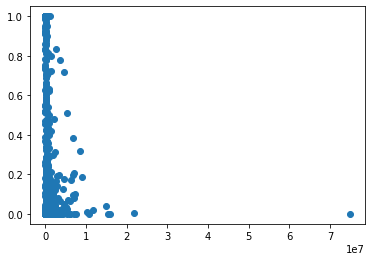

In [19]:
plt.scatter(reducedDf['totalTVL'], reducedDf['Percent In Velo'])

In [20]:
Days = range(100)
retentionList = []

for day in Days :
    reducedDf = reducedDf[reducedDf['TotalDaysSinceEntry'] > day]
    n = len(reducedDf) 
    exits = (reducedDf[reducedDf['totalTVLInVelo'] == 0])
    retention = 1 - sum(exits['DaysUntilExit'] < day) / len(reducedDf)
    retentionList.append(retention)

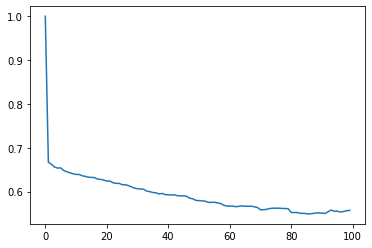

In [21]:
plt.plot(retentionList)

In [22]:
date = pd.Timestamp('2022-12-01')
minDepositValue = 10000

newUsers = list(dfUsers[(dfUsers['entrydate'] > date) & (dfUsers['Net Mints USD'] >= minDepositValue)]['user'])
lostUsers = list(dfUsers[(dfUsers['exitDate'] > date) & (dfUsers['Net Mints USD'] == 0)]['user'])

In [23]:
newUsers

['0xd37f04d801371d8fa13fc9583f7b755fe67bf2b7',
 '0x14da1d50102b7e29103dd28ca2f2796866c99b11',
 '0xb8890f4fe79a1a5e2a9a5fb51b5f0d5b3d9fb057',
 '0xa02a1b6cdb290720596dae852b70cb231d1afe93',
 '0x2c84278aa407886b277bbd96ccf3c0e31a3f8ffd',
 '0xdb9b4f23f19438e8085b4ffa795fe7e2cd142b83',
 '0xf1e7f09c5ae0f98fed0db57181a5ac06b8af1139',
 '0x43ef8dd92ad4f2b5b14366814cb3d8779e1678e9',
 '0x677c40a8d4f9018df9131886f91721455e8d029f',
 '0x0cfcbcdede6b895b62bf4ff9fa1cb2885c833c8a',
 '0x10fbf3fdda393713b883cc73a743b2dd943eff2a',
 '0xd3f179ba57411ad5d2ddb5f334215cdfba134d20',
 '0xa37478676a7a86a6fb9e8d57d3e543eac8140a95',
 '0x0cef5ca5b774f9741a15dafb0baffe2d969474f0',
 '0x47df83408184aaa52dc6adce63f6dec6a8d65c2d',
 '0x598c5e19a132a5c433a80c908f05d87bfdaac4ae',
 '0x535026d766548f5523e29b410abe932e412196d7',
 '0xd91b641ab0080b3702f720cd3febad8fb2e3a56d',
 '0xb4fbd802d9dc5c0208346c311bcb6b9ecff468c6',
 '0x588d52efced12596397b349e0ef651c8f649be1c',
 '0xf1fef7f63499237e0dc651cc27e54a04cbc326e4',
 '0x4c1a69916

In [24]:
summaryCols = ['entrydate', 'exitDate', 'Total Mints USD', 'Net Mints USD']

dfUsers[dfUsers['user'].isin(lostUsers)][summaryCols].sort_values(by = ['Total Mints USD'], ascending = False)

,entrydate,exitDate,Total Mints USD,Net Mints USD
721,2022-08-03 11:46:53,2022-12-27 05:09:10,281992.455872,0.0
34,2023-01-15 12:59:02,2023-01-15 12:59:02,211506.610000,0.0
1184,2022-12-05 17:08:07,2022-12-05 17:14:07,54141.020000,0.0
842,2022-08-13 17:12:52,2023-01-03 20:08:45,31425.040000,0.0
1311,2022-12-30 11:51:59,2022-12-30 11:51:59,30029.080000,0.0
1221,2023-01-22 20:59:03,2023-01-22 20:59:03,24554.180000,0.0
1206,2023-01-02 03:25:12,2023-01-02 03:25:12,15026.490000,0.0
1280,2022-12-12 18:50:22,2022-12-12 18:50:22,42.040000,0.0


In [25]:
dfUsers[dfUsers['user'].isin(newUsers)][summaryCols].sort_values(by = ['Total Mints USD'], ascending = False)

,entrydate,exitDate,Total Mints USD,Net Mints USD
1181,2022-12-06 04:41:03,2022-12-06 04:41:03,2626314.83,2.626315e+06
30,2023-01-15 15:50:23,2023-01-27 12:06:04,1697839.30,1.178021e+06
124,2022-12-22 13:07:19,2022-12-22 13:07:19,1339984.80,8.264570e+05
1214,2023-01-23 19:42:55,2023-01-24 14:45:42,1196300.92,1.196301e+06
1303,2023-01-13 11:30:20,2023-01-13 11:30:20,777889.00,3.982893e+05
...,...,...,...,...
1295,2023-01-08 15:09:39,2023-01-08 15:09:39,20904.42,2.090442e+04
1229,2023-01-22 20:16:07,2023-01-22 20:16:07,20340.78,2.034078e+04
1201,2023-01-21 11:50:48,2023-01-21 11:50:48,19639.18,1.963918e+04
49,2022-12-21 07:23:22,2023-01-16 04:16:52,19458.43,1.945843e+04


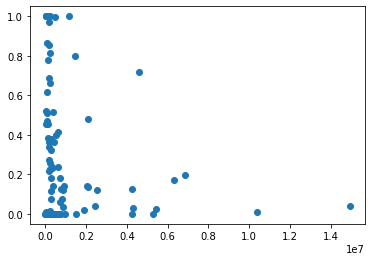

In [26]:
# New User Velo Exposure TVL vs % of assets in VELO 
reducedDf = dfUsers[dfUsers['user'].isin(newUsers)]
plt.scatter(reducedDf['totalTVL'], reducedDf['Percent In Velo'])

In [27]:
otherApps = list(veloDebank['Name'].unique())

exclude = ['Velodrome']
for item in exclude : 
    otherApps.remove(item)

compDf = pd.DataFrame({'Name' : otherApps})

In [28]:
lostUsers

['0xf03639047f75204d00c9314611c2b24570db4405',
 '0x82e8936b187d83fd6eb2b7dab5b19556e9deff1c',
 '0x7b633e7e2cba41921d21008365329ba0b01484fc',
 '0xcc173213e12453c256450b262b1b77ff5f05610b',
 '0x984ffd7236523518b73cef02fbb98e3f06a67bde',
 '0x3b8e1903ed6d4da2c7f88422b72c4b182570293c',
 '0x1f224d73419f2d63022545c127b3a65c31a2cc39',
 '0x63d8e0f850a956e3b358dd1555fc05558efb103f']

In [29]:
def compTVL(row):
    return veloDebank[veloDebank.Name == row['Name']]['Value'].sum()

def compUsers(row):
    return len(veloDebank[veloDebank.Name == row['Name']])

def compTVLGained(row):    
    return veloDebank[(veloDebank.Name == row['Name']) & (veloDebank.User.isin(lostUsers))]['Value'].sum()

def countLostUsers(row):
    return len(veloDebank[(veloDebank.Name == row['Name']) & (veloDebank.User.isin(lostUsers))])

        
compDf['TVLFromSharedUsers'] =  compDf.apply(compTVL, axis=1)      
compDf['nUsers'] =  compDf.apply(compUsers, axis=1)      
compDf['TVLFromLostUsers'] =  compDf.apply(compTVLGained, axis=1)      
compDf['lostUsers'] =  compDf.apply(countLostUsers, axis=1)      


In [30]:
compDf.nlargest(5,['TVLFromLostUsers'])

,Name,TVLFromSharedUsers,nUsers,TVLFromLostUsers,lostUsers
153,Liquity,8.204109e+06,46,869152.770526,2
6,Curve,2.547109e+07,508,736380.894520,3
51,Aura Finance,4.177936e+07,97,517323.249225,1
93,Frax,1.445295e+07,89,434886.822975,1
78,Maia DAO,3.813253e+06,75,306175.851150,1
